In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 1000)

import requests
import pandas as pd
from bs4 import BeautifulSoup

from team_map import team_map

In [6]:
seasons = [2015, 2016, 2017, 2018, 2019]
weeks = [str(w) for w in range(1, 18)]
pbp_url = 'https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_'
weather_url = 'http://www.nflweather.com/en/week/'

def pull_pbp_data(seasons, weeks):
    pbp_lst = []
#    pbp_url = 'https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_'
    for season in seasons:
        print(f'Reading in Play-By-Play data for the {season} season')
        season_pbp = pd.read_csv(pbp_url + str(season) + '.csv')
        pbp_lst.append(season_pbp)

    pbp_df = pd.concat(pbp_lst).reset_index(drop=True)
    
    pbp_df['game_date'] = pd.to_datetime(pbp_df['game_date'])
    pbp_df['month'] = pbp_df.game_date.dt.month
    pbp_df['year'] = pbp_df.game_date.dt.year
    
    return pbp_df

#Pull Play-By-Play Data NFL scrapR github
pbp_df = pull_pbp_data(seasons, weeks)

Reading in Play-By-Play data for the 2015 season
Reading in Play-By-Play data for the 2016 season
Reading in Play-By-Play data for the 2017 season
Reading in Play-By-Play data for the 2018 season
Reading in Play-By-Play data for the 2019 season


In [7]:
class Player:
    
    def __init__(self, number, position, team, name, player_id):
        self.number = number
        self.position = position
        self.team = team
        self.name = name
        self.player_id = player_id
        
    def get_player_pbp_data(self, pbp_df):
        pos_col = self.position + '_player_id'
        player_pbp_df = pbp_df.loc[pbp_df[pos_col] == self.player_id].reset_index(drop=True)
        
        return player_pbp_df
    
    def get_yards_per_game(self, player_pbp_df):
        
        return player_pbp_df.groupby(['game_id', 'year', 'month','home_team', 'away_team'], as_index=False)['yards_gained'].sum()

In [8]:
amari = Player(80, 'receiver', 'Cowboys', 'A.Cooper', '00-0031544')
amari_pbp = amari.get_player_pbp_data(pbp_df)
amari_yds_per_game = amari.get_yards_per_game(amari_pbp)

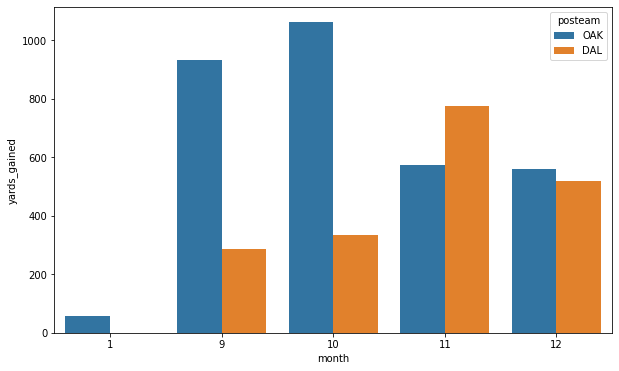

In [9]:
team_yards_in_a_month = amari_pbp.groupby(['month', 'posteam'], as_index = False)['yards_gained'].sum() \
    .sort_values(['month', 'posteam'])

plt.figure(figsize=(10,6))
sns.barplot(x= 'month', y = 'yards_gained', data=team_yards_in_a_month, hue='posteam')

In [17]:
chr(20)

'\x14'

In [10]:
team_games_in_a_month = coop_df.groupby(['month', 'posteam'], as_index=False)['game_id'] \
    .agg({'games': pd.Series.nunique}) \
    .sort_values(['month', 'posteam'])

graph_df = team_yards_in_a_month.merge(team_games_in_a_month, on = ['month', 'posteam'])

NameError: name 'coop_df' is not defined

In [11]:
graph_df['yards_per_game'] = graph_df['yards_gained'] / graph_df['games']

plt.figure(figsize=(10,6))
sns.barplot(x='month', y='yards_per_game', hue='posteam', data=graph_df.loc[graph_df.month != 1])

NameError: name 'graph_df' is not defined

In [12]:
# team_yards_in_a_qtr = coop_df.groupby(['qtr', 'posteam', 'month'], as_index = False)['yards_gained'].sum() \
#     .sort_values(['qtr', 'posteam'])

# sns.barplot(x='qtr', y='yards_gained', data=team_yards_in_a_qtr.loc[team_yards_in_a_qtr.qtr != 5], #hue='posteam'
#            )

# g = sns.FacetGrid(team_yards_in_a_qtr, col="qtr", col_wrap=2, height=1.5)
# g = g.map(plt.hist, "month", "yards_gained", marker=".")

In [ ]:
def request_data(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    return soup

def get_team_data(bs_data):
    teams = bs_data.find_all(class_="team-name text-center")

    away_teams = []
    home_teams = []

    for i, v in enumerate(teams):
        if i % 2 == 0:
            away_teams.append(teams[i].find('a').contents[0])
        else:
            home_teams.append(teams[i].find('a').contents[0])
            
    return away_teams, home_teams

def get_weather_data(bs_data):
    games = bs_data.find_all('tr')

    weather_lst = []
    for i, v in enumerate(games):
        #skip header
        if i > 0:
            game_details = games[i].find_all(class_='text-center')

            forecast = game_details[5].contents[0]

            weather_lst.append(' '.join(forecast.split()))
            
    return weather_lst

In [ ]:
weather_lst = []

for season in seasons:
    print(f'Scraping Weather Data for the {season} Season')
    for week in weeks:
        request_url = f'{weather_url}{season}/week-{week}'
        soup = request_data(request_url)
        
        away_teams, home_teams = get_team_data(soup)
        
        weather = get_weather_data(soup)
        
        weather_df = pd.DataFrame({'away_tm': away_teams,
                                   'home_tm': home_teams,
                                   'weather': weather,
                                  })
        
        weather_df['year'] = season
        weather_df['week'] = week
        
        weather_lst.append(weather_df)
        
full_weather_df = pd.concat(weather_lst).reset_index(drop=True)

coop_weather_df = full_weather_df.loc[(full_weather_df.away_tm.isin(['Cowboys','Raiders'])) |
                                      (full_weather_df.home_tm.isin(['Cowboys','Raiders']))]

In [ ]:
coop_df = coop_df.replace('SD', 'LAC')
coop_df.shape

In [ ]:
coop_weather_df['away_team'] = coop_weather_df['away_tm'].apply(lambda x: team_map[x])
coop_weather_df['home_team'] = coop_weather_df['home_tm'].apply(lambda x: team_map[x])

In [ ]:
merged_coop_df = coop_df.merge(coop_weather_df, how = 'left', on = ['away_team', 'home_team', 'year'])

In [ ]:
merged_coop_df['temp'] = np.where(merged_coop_df.weather == 'DOME',
                                  -999,
                                  merged_coop_df.weather.str.split('f').str[0]).astype(int)

In [ ]:
merged_coop_df.loc[merged_coop_df.weather != 'DOME']['temp'].hist()

In [ ]:
merged_coop_df.loc[merged_coop_df.weather != 'DOME']

In [ ]:
merged_coop_df['temp_bin'] = np.where(merged_coop_df.temp < 50, "<50",
                                      np.where(merged_coop_df.temp < 75,'50-75',
                                      np.where(merged_coop_df.temp >= 75, '>=75', 'NO TEMP')))

In [ ]:
merged_coop_df.temp_bin.value_counts(normalize=True)

In [ ]:
temp_bin_df = merged_coop_df.groupby(['temp_bin'], as_index = False)['game_id',] \
    .agg(pd.Series.nunique) \
    .merge(merged_coop_df.groupby(['temp_bin'], as_index = False)['yards_gained',]
           .agg(np.sum), on = 'temp_bin')

In [ ]:
temp_bin_df['yards_per_game'] = temp_bin_df['yards_gained'] / temp_bin_df['game_id']

In [ ]:
temp_bin_df.sort_values('yards_per_game')